In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("D:\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
'''Removing Customer Id as Its not usefull in Machine Learning Model'''
data.drop("customerID", axis = "columns", inplace = True)

In [6]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data.replace("No phone service","No", inplace = True )
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
def dt(d_ta):
  for i in d_ta.columns:
    print(f'{i} \t\t\t {d_ta[i].unique()}')

In [9]:
dt(data)

gender 			 ['Female' 'Male']
SeniorCitizen 			 [0 1]
Partner 			 ['Yes' 'No']
Dependents 			 ['No' 'Yes']
tenure 			 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService 			 ['No' 'Yes']
MultipleLines 			 ['No' 'Yes']
InternetService 			 ['DSL' 'Fiber optic' 'No']
OnlineSecurity 			 ['No' 'Yes' 'No internet service']
OnlineBackup 			 ['Yes' 'No' 'No internet service']
DeviceProtection 			 ['No' 'Yes' 'No internet service']
TechSupport 			 ['No' 'Yes' 'No internet service']
StreamingTV 			 ['No' 'Yes' 'No internet service']
StreamingMovies 			 ['No' 'Yes' 'No internet service']
Contract 			 ['Month-to-month' 'One year' 'Two year']
PaperlessBilling 			 ['Yes' 'No']
PaymentMethod 			 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges 			 [29.85 56.95 53.

In [10]:
data.replace("No internet service",'No',inplace=True)

In [11]:
data[data.Contract=="One year"]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
12,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
16,Female,0,No,No,52,Yes,No,No,No,No,No,No,No,No,One year,No,Mailed check,20.65,1022.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,Male,0,No,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,104.95,7544.3,No
7031,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,Yes,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.1,No
7036,Female,0,No,No,12,No,No,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No


In [12]:
'''
for ele in data.TotalCharges:
    if ele!=" ":
        pd.to_numeric(ele)
'''

'\nfor ele in data.TotalCharges:\n    if ele!=" ":\n        pd.to_numeric(ele)\n'

In [13]:
data[data.TotalCharges==" "].shape

(11, 20)

In [14]:
data.TotalCharges = pd.to_numeric(data.TotalCharges,errors='coerce')
dt(data)

gender 			 ['Female' 'Male']
SeniorCitizen 			 [0 1]
Partner 			 ['Yes' 'No']
Dependents 			 ['No' 'Yes']
tenure 			 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService 			 ['No' 'Yes']
MultipleLines 			 ['No' 'Yes']
InternetService 			 ['DSL' 'Fiber optic' 'No']
OnlineSecurity 			 ['No' 'Yes']
OnlineBackup 			 ['Yes' 'No']
DeviceProtection 			 ['No' 'Yes']
TechSupport 			 ['No' 'Yes']
StreamingTV 			 ['No' 'Yes']
StreamingMovies 			 ['No' 'Yes']
Contract 			 ['Month-to-month' 'One year' 'Two year']
PaperlessBilling 			 ['Yes' 'No']
PaymentMethod 			 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges 			 [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges 			 [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn 			 ['No' 'Yes']


In [15]:
'''We got empty cells, can be seen above'''
data = data[data.TotalCharges!= " "]

In [16]:
data.TotalCharges.dtypes

dtype('float64')

In [17]:
data.TotalCharges.isnull().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool>

In [18]:
data["tenure"].head()

0     1
1    34
2     2
3    45
4     2
Name: tenure, dtype: int64

Text(0, 0.5, 'Number of Customer')

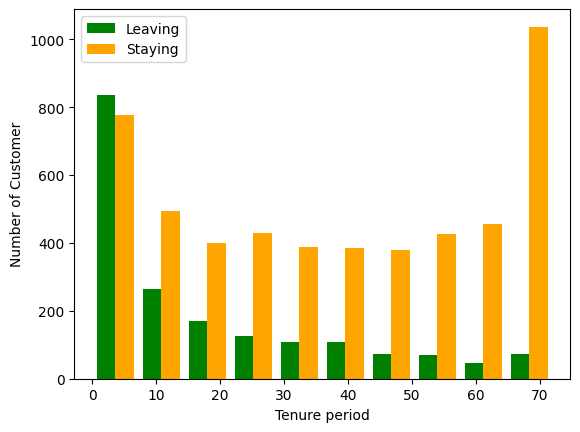

In [19]:
''' People leaving Yes and No '''
data_pe_leaving = data[data.Churn=="Yes"].tenure
data_pe_staying = data[data.Churn=="No"].tenure

plt.hist([data_pe_leaving, data_pe_staying], color=("Green","Orange"), label = ["Leaving", "Staying"])
plt.legend()
plt.xlabel("Tenure period")
plt.ylabel("Number of Customer")

In [22]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn','gender']
for col in yes_no_columns:
    data[col].replace({'Yes': 1,'No': 0, 'Male':1,'Female':0},inplace=True)

''' Dont run 
data.replace({"Yes":1, "No":0},inplace = True)

as in few columns the data gets affected '''

' Dont run \ndata.replace({"Yes":1, "No":0},inplace = True)\n\nas in few columns the data gets affected '

In [75]:
dt(data)

gender 			 [0 1]
SeniorCitizen 			 [0 1]
Partner 			 [1 0]
Dependents 			 [0 1]
tenure 			 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService 			 [0 1]
MultipleLines 			 [0 1]
InternetService 			 ['DSL' 'Fiber optic' 'No']
OnlineSecurity 			 [0 1]
OnlineBackup 			 [1 0]
DeviceProtection 			 [0 1]
TechSupport 			 [0 1]
StreamingTV 			 [0 1]
StreamingMovies 			 [0 1]
Contract 			 ['Month-to-month' 'One year' 'Two year']
PaperlessBilling 			 [1 0]
PaymentMethod 			 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges 			 [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges 			 [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn 			 [0 1]


In [24]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [25]:
one_hot_encoding = pd.get_dummies(data, columns = ["Contract",'InternetService'])

In [26]:
one_hot_encoding

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,0,0,0,1,0,...,Electronic check,29.85,29.85,0,True,False,False,True,False,False
1,1,0,0,0,34,1,0,1,0,1,...,Mailed check,56.95,1889.50,0,False,True,False,True,False,False
2,1,0,0,0,2,1,0,1,1,0,...,Mailed check,53.85,108.15,1,True,False,False,True,False,False
3,1,0,0,0,45,0,0,1,0,1,...,Bank transfer (automatic),42.30,1840.75,0,False,True,False,True,False,False
4,0,0,0,0,2,1,0,0,0,0,...,Electronic check,70.70,151.65,1,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,Mailed check,84.80,1990.50,0,False,True,False,True,False,False
7039,0,0,1,1,72,1,1,0,1,1,...,Credit card (automatic),103.20,7362.90,0,False,True,False,False,True,False
7040,0,0,1,1,11,0,0,1,0,0,...,Electronic check,29.60,346.45,0,True,False,False,True,False,False
7041,1,1,1,0,4,1,1,0,0,0,...,Mailed check,74.40,306.60,1,True,False,False,False,True,False


In [31]:
lis_to = ['Contract_Month-to-month','Contract_One year','Contract_Two year','InternetService_DSL','InternetService_Fiber optic','InternetService_No']
for i in lis_to:
    one_hot_encoding[i].replace({"Yes":1,"No":0}, inplace = True)

In [32]:
one_hot_encoding.head(50)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,0,0,0,1,0,...,Electronic check,29.85,29.85,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,...,Mailed check,56.95,1889.50,0,0,1,0,1,0,0
2,1,0,0,0,2,1,0,1,1,0,...,Mailed check,53.85,108.15,1,1,0,0,1,0,0
3,1,0,0,0,45,0,0,1,0,1,...,Bank transfer (automatic),42.30,1840.75,0,0,1,0,1,0,0
4,0,0,0,0,2,1,0,0,0,0,...,Electronic check,70.70,151.65,1,1,0,0,0,1,0
5,0,0,0,0,8,1,1,0,0,1,...,Electronic check,99.65,820.50,1,1,0,0,0,1,0
6,1,0,0,1,22,1,1,0,1,0,...,Credit card (automatic),89.10,1949.40,0,1,0,0,0,1,0
7,0,0,0,0,10,0,0,1,0,0,...,Mailed check,29.75,301.90,0,1,0,0,1,0,0
8,0,0,1,0,28,1,1,0,0,1,...,Electronic check,104.80,3046.05,1,1,0,0,0,1,0
9,1,0,0,1,62,1,0,1,1,0,...,Bank transfer (automatic),56.15,3487.95,0,0,1,0,1,0,0


In [33]:
yes_no_column = ["Contract_Month-to-month","Contract_One year","Contract_Two year","InternetService_DSL","InternetService_Fiber optic","InternetService_No"]
for colu in yes_no_column:
    one_hot_encoding[colu].replace({True: 1,False: 0},inplace=True)

In [34]:
one_hot_encoding.InternetService_DSL.dtypes

dtype('int64')

In [35]:
one_hot_encoding

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,0,0,0,1,0,...,Electronic check,29.85,29.85,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,...,Mailed check,56.95,1889.50,0,0,1,0,1,0,0
2,1,0,0,0,2,1,0,1,1,0,...,Mailed check,53.85,108.15,1,1,0,0,1,0,0
3,1,0,0,0,45,0,0,1,0,1,...,Bank transfer (automatic),42.30,1840.75,0,0,1,0,1,0,0
4,0,0,0,0,2,1,0,0,0,0,...,Electronic check,70.70,151.65,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,Mailed check,84.80,1990.50,0,0,1,0,1,0,0
7039,0,0,1,1,72,1,1,0,1,1,...,Credit card (automatic),103.20,7362.90,0,0,1,0,0,1,0
7040,0,0,1,1,11,0,0,1,0,0,...,Electronic check,29.60,346.45,0,1,0,0,1,0,0
7041,1,1,1,0,4,1,1,0,0,0,...,Mailed check,74.40,306.60,1,1,0,0,0,1,0


In [36]:
dt(one_hot_encoding)

gender 			 [0 1]
SeniorCitizen 			 [0 1]
Partner 			 [1 0]
Dependents 			 [0 1]
tenure 			 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService 			 [0 1]
MultipleLines 			 [0 1]
OnlineSecurity 			 [0 1]
OnlineBackup 			 [1 0]
DeviceProtection 			 [0 1]
TechSupport 			 [0 1]
StreamingTV 			 [0 1]
StreamingMovies 			 [0 1]
PaperlessBilling 			 [1 0]
PaymentMethod 			 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges 			 [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges 			 [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn 			 [0 1]
Contract_Month-to-month 			 [1 0]
Contract_One year 			 [0 1]
Contract_Two year 			 [0 1]
InternetService_DSL 			 [1 0]
InternetService_Fiber optic 			 [0 1]
InternetService_No 			 [0 1]


In [37]:
one_hot_encoding.dtypes

gender                           int64
SeniorCitizen                    int64
Partner                          int64
Dependents                       int64
tenure                           int64
PhoneService                     int64
MultipleLines                    int64
OnlineSecurity                   int64
OnlineBackup                     int64
DeviceProtection                 int64
TechSupport                      int64
StreamingTV                      int64
StreamingMovies                  int64
PaperlessBilling                 int64
PaymentMethod                   object
MonthlyCharges                 float64
TotalCharges                   float64
Churn                            int64
Contract_Month-to-month          int64
Contract_One year                int64
Contract_Two year                int64
InternetService_DSL              int64
InternetService_Fiber optic      int64
InternetService_No               int64
dtype: object

In [38]:
one_hot_encoding = pd.get_dummies(one_hot_encoding, columns=["PaymentMethod"])

In [39]:
one_hot_encoding.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
Contract_Month-to-month                      int64
Contract_One year                            int64
Contract_Two year              

In [40]:
one_hot_encoding['PaymentMethod_Mailed check']

0       False
1        True
2        True
3       False
4       False
        ...  
7038     True
7039    False
7040    False
7041     True
7042    False
Name: PaymentMethod_Mailed check, Length: 7043, dtype: bool

In [43]:
column = ["PaymentMethod_Bank transfer (automatic)","PaymentMethod_Credit card (automatic)","PaymentMethod_Electronic check","PaymentMethod_Mailed check"]
for colu in column:
    one_hot_encoding[colu].replace({True: 1,False: 0},inplace=True)

In [44]:
one_hot_encoding.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,0,1,0,1,0,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,0,1,0,1,0,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_scaler = ["tenure",'MonthlyCharges','TotalCharges']
one_hot_encoding[columns_scaler] = scaler.fit_transform(one_hot_encoding[columns_scaler])

In [50]:
one_hot_encoding[columns_scaler]

,tenure,MonthlyCharges,TotalCharges
0,0.013889,0.115423,0.001275
1,0.472222,0.385075,0.215867
2,0.027778,0.354229,0.010310
3,0.625000,0.239303,0.210241
4,0.027778,0.521891,0.015330
...,...,...,...
7038,0.333333,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.152778,0.112935,0.037809
7041,0.055556,0.558706,0.033210


In [51]:
X = one_hot_encoding.drop('Churn',axis='columns')
y = one_hot_encoding['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [52]:
X_train.shape

(5634, 26)

In [53]:
y_train.shape

(5634,)

In [61]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='linear'),
    keras.layers.Dense(1, activation='linear')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
177/177 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.7368
Epoch 2/100
177/177 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.7368
Epoch 3/100
177/177 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.7368
Epoch 4/100
177/177 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.7368
Epoch 5/100
177/177 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.7368
Epoch 6/100
177/177 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7368
Epoch 7/100
177/177 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7368
Epoch 8/100
177/177 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7368
Epoch 9/100
177/177 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.7368
Epoch 10/100
177/177 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7368
Epoch 11/100
177/17

In [62]:
model.evaluate(X_test, y_test)

45/45 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7260


[nan, 0.7260468602180481]

In [66]:
yp = model.predict(X_test)
yp[:5]

45/45 [==============================] - 0s 2ms/step


array([[nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [65]:
ypred[:4]

array([[nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [67]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [68]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [70]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1023
           1       0.00      0.00      0.00       386

    accuracy                           0.73      1409
   macro avg       0.36      0.50      0.42      1409
weighted avg       0.53      0.73      0.61      1409



C:\Users\YASHG\PycharmProjects\GPUenabled\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\YASHG\PycharmProjects\GPUenabled\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\YASHG\PycharmProjects\GPUenabled\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

Text(95.72222222222221, 0.5, 'Truth')

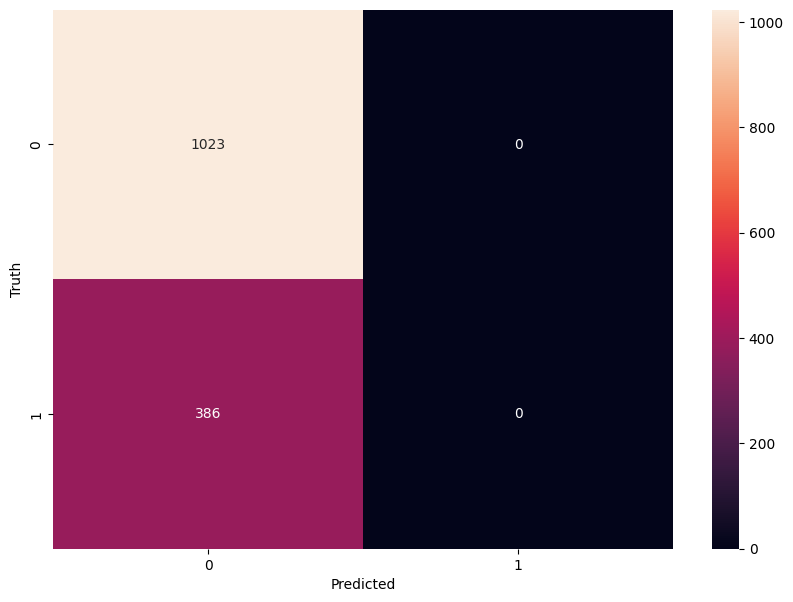

In [73]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [72]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 660.6 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/294.9 kB 919.0 kB/s eta 0:00:01
   --------------------------- ------------ 204.8/294.9 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
